In [25]:
from Model import Model
import matplotlib.pyplot as plt
from matplotlib import animation, rc
import numpy as np
from IPython.display import HTML, Image

# equivalent to rcParams['animation.html'] = 'html5'
rc('animation', html='html5')

%matplotlib inline

In [12]:
p = {'width': 200, 'height': 100, 'pop_total': 100,
     'entrances': 3, 'exits': 2, 'entrance_speed': 4,
     'entrance_space': 2, 'exit_space': 1, 'speed_min': 0.1,
     'speed_desire_mean': 1, 'speed_desire_std': 1,
     'separation': 4, 'wiggle': 1, 'batch_iterations': 900,
     'do_save': True, 'do_plot': False, 'do_ani': False}

In [13]:
m = Model(p)

In [14]:
m.batch()

Starting batch mode with following parameters:
	Parameter	Value
	width:	200
	height:	100
	pop_total:	100
	entrances:	3
	exits:	2
	entrance_speed:	4
	entrance_space:	2
	exit_space:	1
	speed_min:	0.1
	speed_desire_mean:	1
	speed_desire_std:	1
	separation:	4
	wiggle:	1
	batch_iterations:	900
	do_save:	True
	do_plot:	False
	do_ani:	False


	Iterations:  0
	Iterations:  100
	Iterations:  200
	Iterations:  300
	Iterations:  400
	Iterations:  500
	Iterations:  600
	Iterations:  700
	Iterations:  800
Finished at iteration 899

Stats:
Finish Time: 900
Active / Finished / Total agents: 7/93/100
Average time taken: 296.91 steps
Average time delay: 84.42 steps


In [15]:
m.state_history[0]

array([ 0.        , 47.75669819,  0.        , 76.45420274,  0.        ,
       76.45420274,  0.        , 22.92292425,  0.        , 76.45420274,
        0.        , 22.92292425,  0.        , 47.75669819,  0.        ,
       47.75669819,  0.        , 76.45420274,  0.        , 22.92292425,
        0.        , 76.45420274,  0.        , 22.92292425,  0.        ,
       22.92292425,  0.        , 76.45420274,  0.        , 47.75669819,
        0.        , 76.45420274,  0.        , 76.45420274,  0.        ,
       47.75669819,  0.        , 22.92292425,  0.        , 22.92292425,
        0.        , 22.92292425,  0.        , 22.92292425,  0.        ,
       22.92292425,  0.        , 47.75669819,  0.        , 22.92292425,
        0.        , 76.45420274,  0.        , 47.75669819,  0.        ,
       76.45420274,  0.        , 22.92292425,  0.        , 47.75669819,
        0.        , 22.92292425,  0.        , 47.75669819,  0.        ,
       47.75669819,  0.        , 47.75669819,  0.        , 22.92

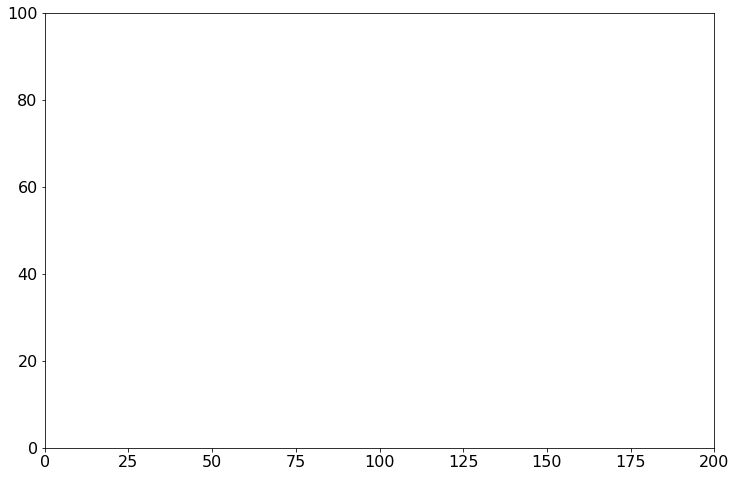

In [66]:
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

fig.set_figheight(8)
fig.set_figwidth(12)

ax.set_xlim(( 0, m.width))
ax.set_ylim((0, m.height))
ax.tick_params(axis='both', which='major', labelsize=16)

points, = ax.plot([], [], marker='.', markersize=8, linestyle='None')

def get_agent_coords(state):
    xs = [x for i, x in enumerate(state) if i % 2 == 0]
    ys = [y for i, y in enumerate(state) if i % 2 == 1]
    return [xs, ys]

def make_coord_hist(state_hist):
    history = []
    for state in state_hist:
        history.append(get_agent_coords(state))
    return history

coord_history = make_coord_hist(m.state_history)

# initialization function: plot the background of each frame
def init():
    points.set_data([], [])
    return (points,)

# animation function. This is called sequentially
def animate(i):
    data = coord_history[i]
    x = data[0]
    y = data[1]
    points.set_data(x, y)
    return (points,)

# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=800, blit=True)

In [67]:
anim

In [68]:
anim.save('./animation.gif', writer='imagemagick', fps=60)